<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_Groover_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%%capture
!pip install qiskit
!pip install imgaug==0.2.5
!pip install pylatexenc

References:

In [9]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl


In [111]:
import numpy as np
from qiskit.quantum_info.operators import Operator

n_qubits = 4
w = np.array([[0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]])

mw = np.identity(2**n_qubits) - 2*np.conjugate(w.T)*w
Uf = Operator(mw)


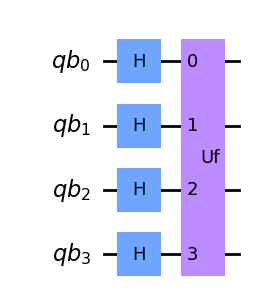

In [107]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector


qr = QuantumRegister(n_qubits, 'qb')
qc = QuantumCircuit()
qc.add_register(qr)

psi_0 = Statevector.from_instruction(qc)

qc.h(qr)
psi_1 = Statevector.from_instruction(qc)

qc.unitary(Uf, [i for i in range(n_qubits)], label="Uf")
psi_2 = Statevector.from_instruction(qc)

qc.draw()


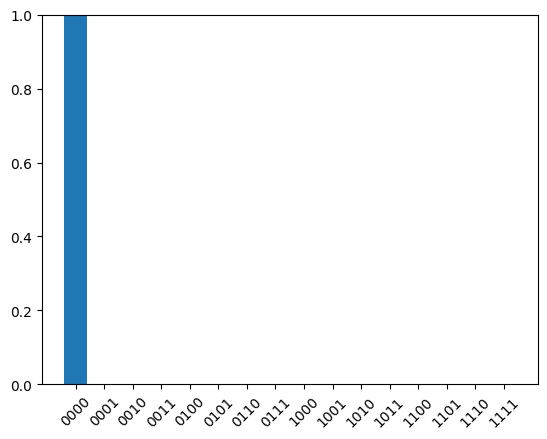

In [108]:
import matplotlib.pyplot as plt

def plot(psi, n_qubits):
  x = [bin(i).replace("0b","").rjust(n_qubits, "0") for i in range(2**n_qubits)]
  #print(x)
  prob = psi.probabilities()
  plt.xticks(rotation = 45)
  plt.bar(x, psi)
  plt.ylim(top=1)

plot(psi_0, n_qubits)

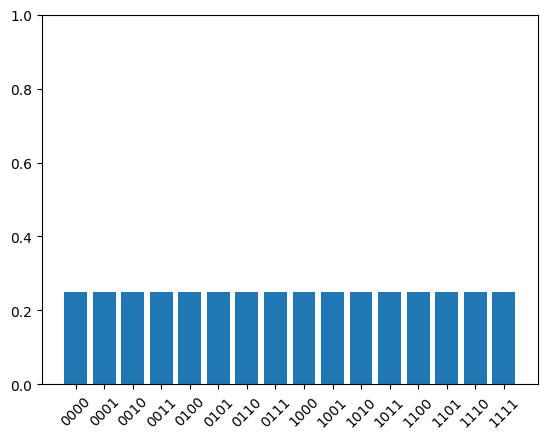

In [109]:
plot(psi_1, n_qubits)

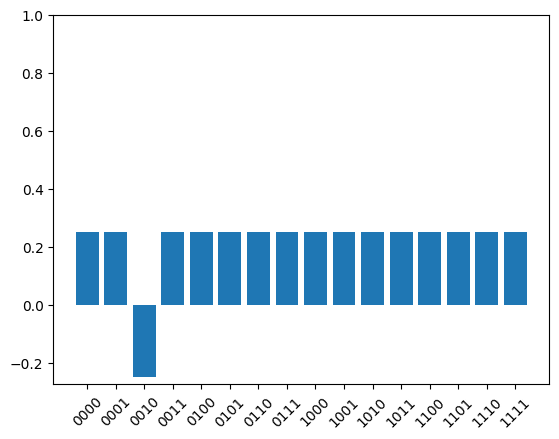

In [110]:
plot(psi_2, n_qubits)

In [24]:
psi = Statevector.from_label('+')

# Probabilities for measuring both qubits
probs = psi.probabilities()
print('probs: {}'.format(probs))

probs: [0.5 0.5]
